<a href="https://colab.research.google.com/github/shanmukhz/Time-Lapse-Fluorescent-Microscopy-Images-/blob/master/DBSCAN_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import cv2
import numpy as np
from collections import deque


In [13]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
os.chdir('/content/drive/My Drive')
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


In [14]:
np.set_printoptions(threshold=np.inf)

Image = cv2.imread("pca_comp1.png",0)

def random_color():
	b = np.random.randint(255,size=(1,))
	g = np.random.randint(255,size=(1,))
	r = np.random.randint(255,size=(1,))

	Color = [b[0],g[0],r[0]]

	return np.array(Color)


In [15]:
Black = np.zeros((Image.shape[0], Image.shape[1],3))


def DBSCAN(D, rad, min_pts):
    # L = np.zeros(D.shape)
    L = np.zeros(D[:, :].shape, dtype=int)
    # print L.shape
    C = 0
    for i in range(D.shape[0]):
        print("ind = ", i)
        for j in range(D.shape[1]):
            C = C + 1
            if L[i, j] == 1:
                continue
            queue = deque([(i, j)])
            seen = []
            while queue:
                coord = queue.popleft()
                (x, y) = coord
                if L[x, y] == 1:
                    continue
                seen.append(coord)
                L[x, y] = 1
                ep = 1
                ix = -1 * ep
                while (ix <= ep):
                    jx = -1 * ep
                    while (jx <= ep):
                        if (x + ix >= 0 and y + jx >= 0 and x + ix <= D.shape[0] - 1 and y + jx <= D.shape[1] - 1 and L[
                            x + ix, y + jx] == 0):
                            px = D[x + ix, y + jx]
                            # dist = abs(D[x,y] - px)
                            dist = np.linalg.norm(D[x, y] - px)
                            # print(D[x,y], px, dist)
                            if (dist <= rad):
                                queue.append((x + ix, y + jx))
                        jx = jx + 1
                    ix = ix + 1
            if (len(seen) < min_pts):

                for k in seen:
                    Black[k[0], k[1], 0] = 0
                    Black[k[0], k[1], 1] = 0
                    Black[k[0], k[1], 2] = 0
            else:
                [i_b, i_g, i_r] = random_color()
                for k in seen:
                    Black[k[0], k[1], 0] = i_b
                    Black[k[0], k[1], 1] = i_g
                    Black[k[0], k[1], 2] = i_r
    return (Black)

In [ ]:
Image = cv2.equalizeHist(Image)
np.divide(Image , 255.0)
img = DBSCAN(Image[:, :],50,500)

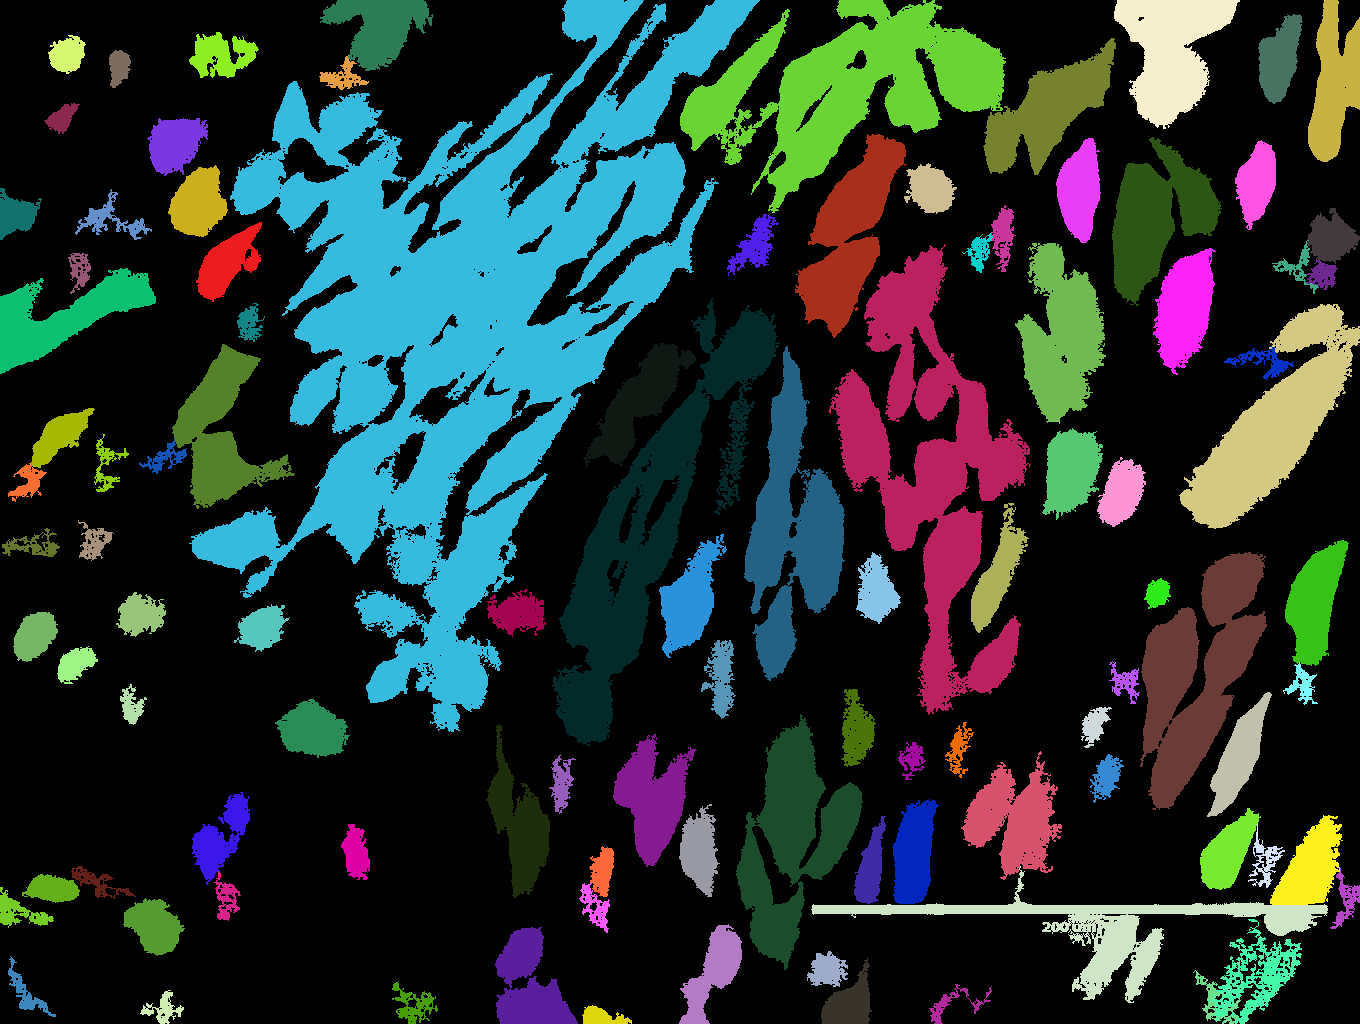

In [18]:
from google.colab.patches import cv2_imshow

cv2_imshow(img)